In [1]:
from vpython import*
import random

# Defining canvas for 3D simulation

scene2 = canvas(title='Charged Particle in Electric Field', width=500, height=400, center=vector(0,0,0), align="left", background=vector(1,1,1))

# Defining Box and particle

lEbox = 10 # Size of box of electric field
lmax = 30 # Size of simulation area
Ebox = box(pos = vector (0,0,0), size = vector (2*lEbox,lEbox,lEbox), color = color.cyan, opacity=0.2)

particle = sphere( pos = vector(-lEbox*2,0,0), radius = 0.5, velocity = vec(10,0,0), charge = 1, mass = 10, color =color.blue, make_trail=True, trail_type="points", interval=20, retain=100)

# Defining function to calculation Electric field

def E(r):
  E_mag = 10
  E_dir = norm(vec(1,0,0))
  if (r.x>= -Ebox.size.x/2. and r.x <= Ebox.size.x/2. and r.y>= -Ebox.size.y/2. and r.y <= Ebox.size.y/2. and r.z>= -Ebox.size.z/2. and r.z <= Ebox.size.z/2.):
    E_val = E_mag*E_dir
  else:
    E_val = 0*E_dir
  return E_val

# Defining function to calculate acceleration due to electric force

def acc(a):
  force = a.charge*E(a.pos)
  return force/a.mass

# Defining Graph Canvas and Graph for motion of particle

graph1=graph(width=500,height=400,align="right", title='Kinetic Energy Vs. Time', xtitle='Time',ytitle='Kinetic Energy',foreground=color.black, background=color.white)
Graph_KE=gcurve(graph=graph1,color=color.red)

# Updating postion of particle in loop

t = 0
dt = 0.002

while (t <15):
  rate(100)
  particle.velocity = particle.velocity + acc(particle)*dt
  particle.pos = particle.pos + particle.velocity*dt
  
  KE = 0.5*particle.mass*mag(particle.velocity)**2
  Graph_KE.plot(pos=(t,KE))
  if (particle.pos.x > lmax or particle.pos.x < -lmax):  
    # Stop updating position of particle if goes outside region of interest
    break
  t = t+dt

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

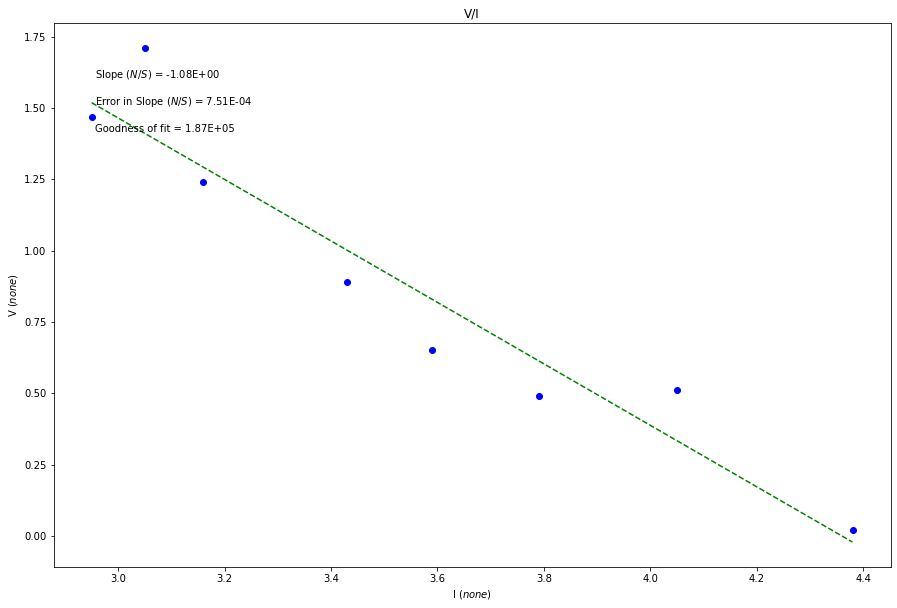

In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
#Re-assign variables as x, y, dy so that the following code may remain generic
x = np.array([2.95,3.05,3.16,3.43,3.59,3.79,4.05,4.38])
y = np.array([1.47,1.71,1.24,.89,.65,.49,.51,.02])
dy = np.array([.001,.001,.001,.001,.001,.001,.001,.001])
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)
#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x
#Calculate the error in slope and intercept (you do not need to understand how these are calculated). 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
    
D=Delta(x, dy)
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept
#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)
#Plot data on graph. Plot error bars and place values for slope, error in slope and goodness of fit on the plot using "annotate"
plt.figure(figsize=(15,10))
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
#create labels  
plt.xlabel('I ($none$)')
plt.ylabel('V ($none$)')
plt.title('V/I')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="None") #don't need to plot x error bars
 
plt.annotate('Slope ($N$/$S$) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope ($N$/$S$) = {value:.{digits}E}'.format(value=dm, digits=2),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()

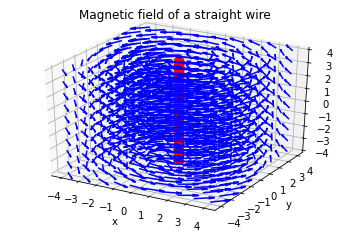

In [3]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-4,4,10)
y = np.linspace(-4,4,10)
z = np.linspace(-4,4,10)

x,y,z = np.meshgrid(x,y,z)

# 3d figure
fig = plt.figure()
ax = fig.gca(projection='3d')

def B(x,y):
    i = 1                                           #Amps in the wire
    mu = 1.26 * 10**(-6)                            #Magnetic constant                       
    mag = (mu/(2*np.pi))*(i/np.sqrt((x)**2+(y)**2)) #Magnitude of the vector B
    by = mag * (np.cos(np.arctan2(y,x)))            #By
    bx = mag * (-np.sin(np.arctan2(y,x)))           #Bx
    bz = z*0                                        #Bz (zero, using the right-hand rule)
    return bx,by,bz

def cylinder(r):
    phi = np.linspace(-2*np.pi,2*np.pi,100)
    x = r*np.cos(phi)
    y = r*np.sin(phi)
    return x,y

# Plot of the fields
bx,by,bz = B(x,y)                                   #Magnetic field
cx,cy = cylinder(0.2)                               #Wire

# Plot of the 3d vector field
ax.quiver(x,y,z,bx,by,bz,color='b',length=1,normalize=True)
                                                    #Plot the magnetic field
for i in np.linspace(-4,4,800):                     #Plot the wire
    ax.plot(cx,cy,i,label='Cylinder',color='r')

plt.title('Magnetic field of a straight wire')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

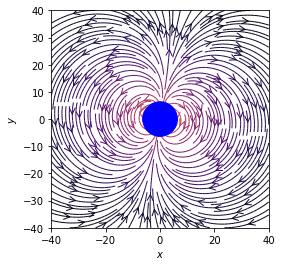

In [4]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Mean magnitude of the Earth's magnetic field at the equator in T
B0 = 3.12e-5
# Radius of Earth, Mm (10^6 m: mega-metres!)
RE = 6.370
# Deviation of magnetic pole from axis
alpha = np.radians(9.6)

def B(r, theta):
    """Return the magnetic field vector at (r, theta)."""
    fac = B0 * (RE / r)**3
    return -2 * fac * np.cos(theta + alpha), -fac * np.sin(theta + alpha)

# Grid of x, y points on a Cartesian grid
nx, ny = 64, 64
XMAX, YMAX = 40, 40
x = np.linspace(-XMAX, XMAX, nx)
y = np.linspace(-YMAX, YMAX, ny)
X, Y = np.meshgrid(x, y)
r, theta = np.hypot(X, Y), np.arctan2(Y, X)

# Magnetic field vector, B = (Ex, Ey), as separate components
Br, Btheta = B(r, theta)
# Transform to Cartesian coordinates: NB make North point up, not to the right.
c, s = np.cos(np.pi/2 + theta), np.sin(np.pi/2 + theta)
Bx = -Btheta * s + Br * c
By = Btheta * c + Br * s

fig, ax = plt.subplots()

# Plot the streamlines with an appropriate colormap and arrow style
color = 2 * np.log(np.hypot(Bx, By))
ax.streamplot(x, y, Bx, By, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Add a filled circle for the Earth; make sure it's on top of the streamlines.
ax.add_patch(Circle((0,0), RE, color='b', zorder=100))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-XMAX, XMAX)
ax.set_ylim(-YMAX, YMAX)
ax.set_aspect('equal')
plt.show()

In [22]:
import pygame
import time
import random as r
import numpy as np

pygame.init()

display_width = 800
display_height = 600

electrodynamics = True
show_field = False

Ball_num = 7
c = 10
red = (255,0,0)
white = (255,255,255)
gameDisplay = pygame.display.set_mode((display_width,display_height))
pygame.display.set_caption('bouncy')
clock = pygame.time.Clock()

def normalized(a):
    b = np.linalg.norm(a)
    if not(b == 0):
        return a/b
    else:
        return np.zeros((1,3), dtype = float)

def tot_EM_field_at_charge(charges, charge):

    EM = np.array([[0.,0.,0.],[0.,0.,0.]], dtype = float)

    for q in charges:
        EM = EM + q.EM_field(charge.position)

    return EM

def Force_on_bally(field, charge):
    c = np.cross(charge.velocity, field[1])
    force = charge.mass*(field[0] + np.cross(charge.velocity, field[1]))
    return force

class arrow(object):

    def __init__(self, length, x, y, charges):


        self.length = length
        self.position = np.array([x,y,0])

        self.field = tot_EM_field_at_charge(charges, self)
        self.field_mag= np.linalg.norm(self.field[0])
        if self.field_mag == 0:            
            self.field_direction = np.zeros(3,)
        else:    
            self.field_direction = self.field[0]/self.field_mag

        self.position_end()
        self.color()
        self.show()
    def position_end(self):

        self.position_2 = self.position + self.field_direction * self.length

        return self.position_2

    def color(self):
        self.color = self.field_mag
        if self.color < 0.05:
            self.color = (46,120,255)
        elif self.color < 0.1:
            self.color = (147,145,252)
        elif self.color < 0.3:
            self.color = (249,23,28)
        elif self.color < 0.6:
            self.color =(251,139,33) 
        elif self.color < 1:
            self.color = (255,255,127)
        else:
            self.color = (255,255,255)


        return self.color
    def show(self):
        pygame.draw.line(gameDisplay, self.color,(int(self.position[0]), int(self.position[1])), (int(self.position_2[0]), int(self.position_2[1])))








class Ball(object):
    def __init__(self, x, y, m, c, v_x, v_y):
        self.position = np.array([x,y,0], dtype = float)
        self.position_2 = np.array([x,y,0], dtype = float)
        self.velocity = np.array([v_x, v_y,0], dtype = float)
        self.velocity_2 = np.array([v_x, v_y,0], dtype = float)
        self.acceleration = np.array([0.,0.,0.], dtype = float)
        self.mass = m
        self.color = c

    def acceleration_compute(self,force):
        a = force/self.mass
        self.acceleration += a

    def move(self):
        self.velocity += self.acceleration
        self.position += self.velocity
        self.acceleration *= 0

    def show(self):
        pygame.draw.circle(gameDisplay, self.color, [int(self.position[0]), int(self.position[1])], self.mass)

    def Edgelord(self):
        if ((self.position[0] + self.velocity[0] >= display_width-self.mass) and self.velocity[0] > 0):
            self.velocity[0] *= -1
            self.position[0] = display_width - self.mass + self.velocity[0]


        elif ((self.position[0] + self.velocity[0] - self.mass  <= 0) and self.velocity[0] < 0 ):

            self.velocity[0] *= -1
            self.position[0] = self.mass + self.velocity[0] 


        elif ((self.position[1] + self.velocity[1] >= display_height - self.mass) and self.velocity[1] > 0):

            self.velocity[1] *= -1
            self.position[1] = display_height - self.mass + self.velocity[1]


        elif ((self.position[1] + self.velocity[1] - self.mass  <= 0) and self.velocity[1] < 0 ):

            self.position[1] = self.mass -self.velocity[1]
            self.velocity[1] *= -1

    def EM_field(self, R):
        radius = np.linalg.norm(R - self.position)
        if radius != 0:
            unitradius = (R - self.position)/radius
        else:
            unitradius = np.zeros(3, )

        if np.linalg.norm(radius) != 0 and np.dot(unitradius, self.velocity)!=1:
            charge      = self.mass / (1 - np.dot(unitradius, self.velocity) ** 3)


            if radius < self.mass:
                radius = self.mass

            radius2     = radius ** 2

            velocity_in_c = self.velocity/c

            oneMinusV2  = 1 - np.dot(velocity_in_c, velocity_in_c)
            uMinusV     = unitradius - velocity_in_c
            aCrossUmV   = np.cross(uMinusV, self.acceleration);
            Eleft       = (oneMinusV2 * (unitradius - velocity_in_c)) / radius2
            Eright      = np.cross(unitradius, aCrossUmV) / (radius*c**2)
            E           = charge * (Eleft - Eright)
            #E = np.zeros(3, )
            B           = np.cross(unitradius/c, ((charge*c**2) * (Eleft - Eright)))

            EM_field = np.array([E,B], dtype = float)
        else:
            EM_field = np.zeros((2,3), dtype = float)

        return EM_field

ballys = []

for i in range(Ball_num):
    #ballys.insert(i, Ball(r.randrange(300,display_width - 5, 10),r.randrange(200,display_height/2,1)   , r.randrange(5,10,1),(r.randint(1,255),r.randint(1,255),r.randint(1,255)), r.randint(-200,200)/1000, r.randint(-200,200)/1000))
    ballys.insert(i, Ball(200 + i*50, 220 + i*20 , 10,(r.randint(1,255),r.randint(1,255),r.randint(1,255)),0, 0 ))
#ballys.append( Ball(300 + 50, 300, 10,(r.randint(1,255),r.randint(1,255),r.randint(1,255)),10, 0 )) 

up = np.zeros(3,)
down = np.zeros(3,)
right = np.array([0.,0.,0.])
left = np.array([0.,0.,0.])
grav = np.array([0.,0.1,0.])
repulsion = np.array([0.,0.,0.])

crashed = False

while not crashed :

    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
            quit()

        if event.type == pygame.KEYDOWN:
            if event.key == pygame.K_LEFT:
                left = np.array([-0.1, 0.,0.])
            if event.key == pygame.K_RIGHT:
                right = np.array([0.1,0.,0.])
            if event.key == pygame.K_DOWN:
                down = np.array([0.,0.1,0.])
            if event.key == pygame.K_UP:
                up = np.array([0.,-0.1,0.])

        if event.type == pygame.KEYUP:
            if event.key == pygame.K_LEFT or event.key == pygame.K_RIGHT or event.key == pygame.K_UP or event.key == pygame.K_DOWN :
                right = np.array([0.,0.,0.])
                left = np.array([0.,0.,0.])
                down = np.zeros(3,)
                up = np.zeros(3,)

    gameDisplay.fill(white)

    if show_field == True:
        for i in range(display_width//20):
            for j in range(display_height//20):
                arry = arrow(8, 10 + i*20, 10 + j*20 , ballys)



    if electrodynamics == True:
        for bally in ballys:
            bally.acceleration_compute(Force_on_bally(tot_EM_field_at_charge(ballys, bally), bally))

    for i, bally in enumerate(ballys):

        #if electrodynamics == True:
          #  bally.acceleration_compute(Force_on_bally(tot_EM_field_at_charge(ballys, bally), bally))
        bally.Edgelord()

        bally.acceleration_compute(up)
        bally.acceleration_compute(down)
        bally.acceleration_compute(right)
        bally.acceleration_compute(left)

        #ballys[i].acceleration_compute(grav * ballys[i].mass)

        for bally2 in ballys[i+1:]:

            #checks collisions
            if  np.linalg.norm(bally.position - bally2.position) <= bally.mass  + bally2.mass  :

                bally.velocity_2 = (bally.mass * bally.velocity + bally2.mass * bally2.velocity + bally2.mass *(bally2.velocity - bally.velocity))/ (bally.mass + bally2.mass)
                bally2.velocity_2 = (bally.mass * bally2.velocity + bally.mass * bally.velocity + bally.mass *(bally.velocity - bally2.velocity))/ (bally2.mass + bally.mass)

                #prevents balls getting stuck in each other and assignes new velocitys
                if not(np.linalg.norm(bally.position + bally.velocity_2  - (bally2.position + bally2.velocity_2) ) <= bally.mass  + bally2.mass):
                        bally.velocity = bally.velocity_2
                        bally2.velocity = bally2.velocity_2

        bally.Edgelord()

        bally.move()
        bally.show()

    pygame.display.update()
    clock.tick(60)

pygame.quit()
quit()

pygame 2.0.1 (SDL 2.0.14, Python 3.8.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


error: display Surface quit

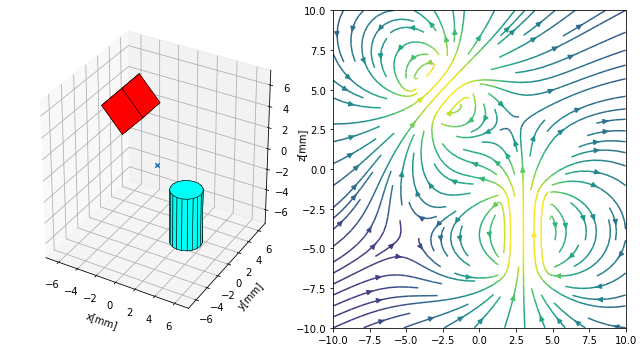

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from magpylib.source.magnet import Box,Cylinder
from magpylib import Collection, displaySystem

# create magnets
s1 = Box(mag=(0,0,600), dim=(3,3,3), pos=(-4,0,3))
s2 = Cylinder(mag=(0,0,500), dim=(3,5))

# create collection
c = Collection(s1,s2)

# manipulate magnets individually
s1.rotate(45,(0,1,0), anchor=(0,0,0))
s2.move((5,0,-4))

# manipulate collection
c.move((-2,0,0))

# calculate B-field on a grid
xs = np.linspace(-10,10,33)
zs = np.linspace(-10,10,44)
POS = np.array([(x,0,z) for z in zs for x in xs])
Bs = c.getB(POS).reshape(44,33,3)     #<--VECTORIZED

# create figure
fig = plt.figure(figsize=(9,5))
ax1 = fig.add_subplot(121, projection='3d')  # 3D-axis
ax2 = fig.add_subplot(122)                   # 2D-axis

# display system geometry on ax1
displaySystem(c, subplotAx=ax1, suppress=True)

# display field in xz-plane using matplotlib
X,Z = np.meshgrid(xs,zs)
U,V = Bs[:,:,0], Bs[:,:,2]
ax2.streamplot(X, Z, U, V, color=np.log(U**2+V**2))

plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Spice.Netlist import Circuit
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Unit import *
from PySpice.Physics.SemiConductor import ShockleyDiode


libraries_path = find_libraries()
spice_library = SpiceLibrary(libraries_path)
circuit = Circuit('Diode Characteristic Curve')

circuit.include(spice_library['1N4148'])

circuit.V('input', 'in', circuit.gnd, 10@u_V)
circuit.R(1, 'in', 'out', 1@u_Ω) # not required for simulation
circuit.X('D1', '1N4148', 'out', circuit.gnd)
# Fixme: Xyce ???
temperatures = [0, 25, 100]@u_Degree
analyses = {}
for temperature in temperatures:
    simulator = circuit.simulator(temperature=temperature, nominal_temperature=temperature)
    analysis = simulator.dc(Vinput=slice(-2, 5, .01))
    analyses[float(temperature)] = analysis
silicon_forward_voltage_threshold = .7

shockley_diode = ShockleyDiode(Is=4e-9, degree=25)

def two_scales_tick_formatter(value, position):
    if value >= 0:
        return '{} mA'.format(value)
    else:
        return '{} nA'.format(value/100)
formatter = ticker.FuncFormatter(two_scales_tick_formatter)

figure, (ax1, ax2) = plt.subplots(2, figsize=(20, 10))

ax1.set_title('1N4148 Characteristic Curve ')
ax1.set_xlabel('Voltage [V]')
ax1.set_ylabel('Current')
ax1.grid()
ax1.set_xlim(-2, 2)
ax1.axvspan(-2, 0, facecolor='green', alpha=.2)
ax1.axvspan(0, silicon_forward_voltage_threshold, facecolor='blue', alpha=.1)
ax1.axvspan(silicon_forward_voltage_threshold, 2, facecolor='blue', alpha=.2)
ax1.set_ylim(-500, 750) # Fixme: round
ax1.yaxis.set_major_formatter(formatter)
Vd = analyses[25].out
# compute scale for reverse and forward region
forward_region = Vd >= 0@u_V
reverse_region = np.invert(forward_region)
scale =  reverse_region*1e11 + forward_region*1e3
for temperature in temperatures:
    analysis = analyses[float(temperature)]
    ax1.plot(Vd, - analysis.Vinput * scale)
ax1.plot(Vd, shockley_diode.I(Vd) * scale, 'black')
ax1.legend(['@ {} °C'.format(temperature)
            for temperature in temperatures] + ['Shockley Diode Model Is = 4 nA'],
           loc=(.02,.8))
ax1.axvline(x=0, color='black')
ax1.axhline(y=0, color='black')
ax1.axvline(x=silicon_forward_voltage_threshold, color='red')
ax1.text(-1, -100, 'Reverse Biased Region', ha='center', va='center')
ax1.text( 1, -100, 'Forward Biased Region', ha='center', va='center')
ax2.set_title('Resistance @ 25 °C')
ax2.grid()
ax2.set_xlim(-2, 3)
ax2.axvspan(-2, 0, facecolor='green', alpha=.2)
ax2.axvspan(0, silicon_forward_voltage_threshold, facecolor='blue', alpha=.1)
ax2.axvspan(silicon_forward_voltage_threshold, 3, facecolor='blue', alpha=.2)
analysis = analyses[25]
static_resistance = -analysis.out / analysis.Vinput
dynamic_resistance = np.diff(-analysis.out) / np.diff(analysis.Vinput)
ax2.semilogy(analysis.out, static_resistance, basey=10)
ax2.semilogy(analysis.out[10:-1], dynamic_resistance[10:], basey=10)
ax2.axvline(x=0, color='black')
ax2.axvline(x=silicon_forward_voltage_threshold, color='red')
ax2.axhline(y=1, color='red')
ax2.text(-1.5, 1.1, 'R limitation = 1 Ω', color='red')
ax2.legend(['{} Resistance'.format(x) for x in ('Static', 'Dynamic')], loc=(.05,.2))
ax2.set_xlabel('Voltage [V]')
ax2.set_ylabel('Resistance [Ω]')

plt.tight_layout()
plt.show()


KeyError: '1N4148'

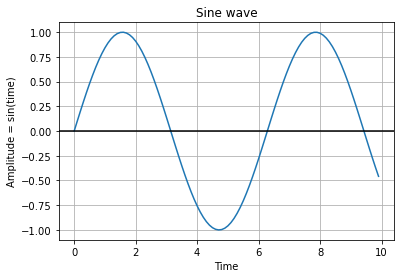

In [6]:
import numpy as np
import matplotlib.pyplot as plot
 
# Get x values of the sine wave
time = np.arange(0,10,0.1)
 
amplitude = np.sin(time)
plot.plot(time, amplitude)
 
# text labels
plot.title('Sine wave')
plot.xlabel('Time')
plot.ylabel('Amplitude = sin(time)')
 
# Generate the grid/axes
plot.grid(True, which='both')
 
# Generate the actual data plot
plot.axhline(y=0, color='k')
 
# Display plot
plot.show()

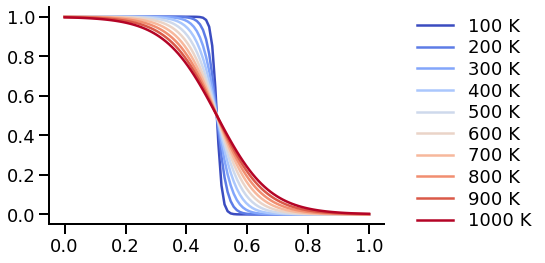

In [7]:
# Import packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
# Fermi-Dirac Distribution
def fermi(E: float, E_f: float, T: float) -> float:
    k_b = 8.617 * (10**-5) # eV/K
    return 1/(np.exp((E - E_f)/(k_b * T)) + 1)
# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 2
# Create figure and add axes
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
# Temperature values
T = np.linspace(100, 1000, 10)
# Get colors from coolwarm colormap
colors = plt.get_cmap('coolwarm', 10)
# Plot F-D data
for i in range(len(T)):
    x = np.linspace(0, 1, 100)
    y = fermi(x, 0.5, T[i])
    ax.plot(x, y, color=colors(i), linewidth=2.5)
# Add legend
labels = ['100 K', '200 K', '300 K', '400 K', '500 K', '600 K', 
          '700 K', '800 K', '900 K', '1000 K']
ax.legend(labels, bbox_to_anchor=(1.05, -0.1), loc='lower left', 
          frameon=False, labelspacing=0.2)


In [11]:
from visual import*
display(width=600,height=600,center=vector(0,12,0),background=color.white)
g=9.8 # acceleration due to gravity
bob=sphere(pos=vector(5,2,0),radius=0.5,color=color.blue)
pivot=vector(0,20,0)
roof=box(pos=pivot,size=vector(10,0.5,10),color=color.green)
rod=cylinder(pos=pivot,axis=bob.pos-pivot,radius=0.1,color=color.red)
t=0 # time 
dt=0.01 # time interval 
l=mag(bob.pos-pivot) # length of pendulum
cs=(pivot.y-bob.pos.y)/l # calculation of cos(theta) 
theta=acos(cs) # angle with vertical direction
vel=0.0 # angular velocity
while (t<100):
  rate(100) # maximum 100 calculations per second
  acc=-g/l*sin(theta) # updating of angular acceleration
  theta=theta+vel*dt # updating of angular position
  vel=vel+acc*dt # updating of angular velocity
  bob.pos=vector(l*sin(theta),pivot.y-l*cos(theta),0) # cal. position
  rod.axis=bob.pos-rod.pos # updating other end of rod of pendulum
  t=t+dt # updating time

ModuleNotFoundError: No module named 'visual'

In [12]:
from visual import*
display(width=600,height=600,center=vector(6,0,0),background=color.white)
wall=box(pos=vector(0,1,0),size=vector(0.2,3,2),color=color.green)
floor=box(pos=vector(6,-0.6,0),size=vector(14,0.2,4),color=color.green)
Mass=box(pos=vector(12,0,0),velocity=vector(0,0,0),size=vector(1,1,1),mass=1.0,color=color.blue)
pivot=vector(0,0,0)
spring=helix(pos=pivot,axis=Mass.pos-pivot,radius=0.4,constant=1,thickness=0.1,coils=20,color=color.red)
eq=vector(9,0,0)
t=0
dt=0.01
while (t<50):
  rate(100)
  acc=(eq-Mass.pos)*(spring.constant/Mass.mass)
  Mass.velocity=Mass.velocity+acc*dt
  Mass.pos=Mass.pos+Mass.velocity*dt
  spring.axis=Mass.pos-spring.pos
  t=t+dt

ModuleNotFoundError: No module named 'visual'

[[ 0.00000000e+00  5.00000000e-01  1.00000000e+00  1.50000000e+00
   2.00000000e+00  2.50000000e+00  3.00000000e+00  3.50000000e+00
   4.00000000e+00  4.50000000e+00  5.00000000e+00  5.50000000e+00
   6.00000000e+00  6.50000000e+00  7.00000000e+00  7.50000000e+00
   8.00000000e+00  8.50000000e+00  9.00000000e+00  9.50000000e+00
   1.00000000e+01  1.05000000e+01  1.10000000e+01  1.15000000e+01
   1.20000000e+01  1.25000000e+01  1.30000000e+01  1.35000000e+01
   1.40000000e+01  1.45000000e+01  1.50000000e+01  1.55000000e+01
   1.60000000e+01  1.65000000e+01  1.70000000e+01  1.75000000e+01
   1.80000000e+01  1.85000000e+01  1.90000000e+01  1.95000000e+01]
 [ 1.00000000e+01  8.63243197e+00  7.45188817e+00  6.43279177e+00
   5.55306373e+00  4.79364449e+00  4.13808099e+00  3.57217026e+00
   3.08365168e+00  2.66194133e+00  2.29790275e+00  1.98364891e+00
   1.71237143e+00  1.47819299e+00  1.27604004e+00  1.10153288e+00
   9.50890768e-01  8.20849986e-01  7.08593166e-01  6.11688230e-01
   5.2803

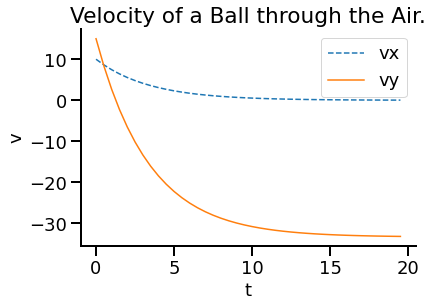

In [13]:
import numpy as np
g = 9.81
tau = 3.4
def vd(t, v0):
    ext = np.exp(-t/tau)
    (vx0, vy0) = v0
    return np.array( (t, vx0 * ext, -g*tau + (vy0 + g * tau)*ext) )
np.array( (0, 1, 2) )/tau
np.exp( -np.array( (0, 1, 2) )/tau )
t = np.arange(0,20,0.5)
v0 = (10, 15)
vdt = vd(t,v0)
print(vdt)
def vdplot(vdt):
    from matplotlib.pyplot import plot, \
        title, xlabel, ylabel, legend, \
        show, close
    (t, vdx, vdy) = vdt
    plot(t,vdx, label='vx', linestyle='dashed')
    plot(t,vdy, label='vy')
    title('Velocity of a Ball through the Air.')
    xlabel('t')
    ylabel('v')
    legend()
    show()
    close()

vdplot(vdt)

In [14]:
import numpy as np
L = np.random.random(100)
sum(L)
55.61209116604941
np.sum(L)
55.612091166049424
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

261 ms ± 46.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.54 ms ± 174 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
import matplotlib . pyplot as P
LENGTH = 100
def main ( ) :
    current = [ 0 . 0 ] ∗ (LENGTH + 2 )
current [ 0 ] = 7 0 . 0
current[−1] = 1 0 0 . 0
P . plot(current)
P . xlabel( ” segment ” )
P . ylabel( ” temperature ” )
P . show ( )
main ( )
def floats_equiv(a , b , epsilon) :
return abs (a − b) <= epsilon
def lists_equiv(a , b , epsilon) :
assert len (a) == len (b)
for i in range ( len (a) ) :
if not floats_equiv(a[i ] , b[i←-
] , epsilon) :
return False
return True
def main ( ) :
current = [ 0 . 0 ] ∗ (LENGTH + 2 )
current [ 0 ] = 7 0 . 0
current[−1] = 1 0 0 . 0
after = distribute(current)
w hil e n ot lists_equiv(after , ←-
current , EPSILON) :
current = after # t h i s i s n ot←-
a copy , but are labelling
after = distribute(current)
P.plot(current)
P.xlabel( ” segment ” )
P.ylabel( ” temperature ” )
P.show ( )
